In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.3 MB/s eta 0:00:00


In [3]:
df=pd.read_csv('preprocessed_data.csv')

In [4]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,and Auto Loan,and Credit-Builder Loan,and Debt Consolidation Loan,and Home Equity Loan,and Mortgage Loan,and Not Specified,and Payday Loan,and Personal Loan,and Student Loan,Cluster
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,1,0,0,0,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0,0,0,1,0,0,0,0,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,1,0,0,0,0,0,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,1,0,0,0,0,0,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df["Cluster"].unique()

array([0, 1, 2])

In [6]:
X = df[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']]
y = (df['Num_of_Delayed_Payment'] > 5).astype(int)

In [7]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and predict
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display model performance
print(models)

100%|██████████| 29/29 [05:46<00:00, 11.94s/it]

[LightGBM] [Info] Number of positive: 69962, number of negative: 10038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.874525 -> initscore=1.941574
[LightGBM] [Info] Start training from score 1.941574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Step 4: Fit the model
adaboost.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


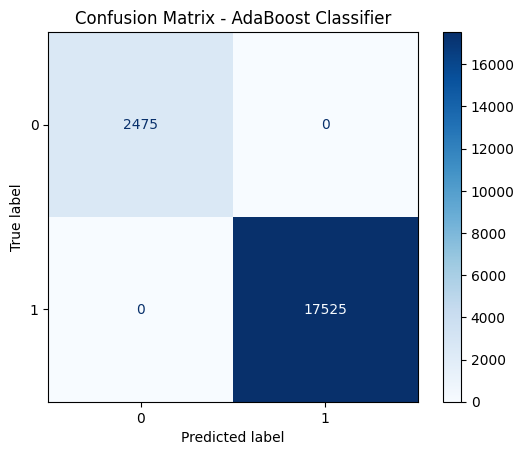

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(adaboost, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


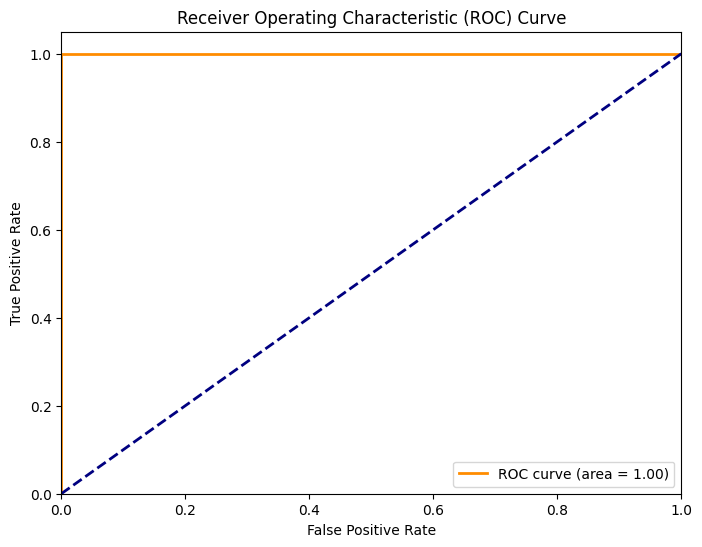

In [14]:
# ROC Curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


y_pred_prob = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
# Example input values for the features
new_data = pd.DataFrame({
    'Delay_from_due_date': [2],
    'Num_of_Delayed_Payment': [2],
    'Outstanding_Debt': [15000],
    'Credit_Utilization_Ratio': [35],
    'Total_EMI_per_month': [500]
})

# Predict using the trained model
predicted_class = adaboost.predict(new_data)


print(f"Predicted Class: {predicted_class[0]}")



Predicted Class: 0


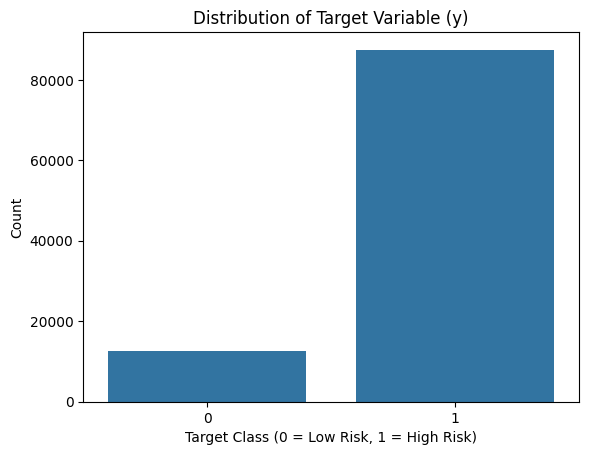

In [16]:
sns.countplot(x=y)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Class (0 = Low Risk, 1 = High Risk)')
plt.ylabel('Count')
plt.show()